# Explore Theseus Dataset
Updated: 02.05.2021<br>
Mai Vu

In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Library to read the data
import pickle

#Library to detect the language
from langdetect import detect

#Libraries for data visualization
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

#Libraries for lemmatization
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from libvoikko import Voikko #For Finnish

#Libraries for word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

## 1. Data Preprocessing

### 1.1 Read the data

In [2]:
#Read the data from file
handles, http_pages = pickle.load(open(r"final_Theseus_database_annif.pickle", 'rb'))

#Change dict to dataframe
df = pd.DataFrame(handles)
df = df.T
df.reset_index(inplace = True)
df.head(5)

,index,url,stream_url,is_downloaded,pdf_name,txt_url,pdf_url,info,filesize_bytes,filename,info_valid
0,10024/19606,https://www.theseus.fi/handle/10024/19606,https://www.theseus.fi/bitstream/handle/10024/...,False,[jamk_1250169708_1.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Sirviö, Timo', 'dc....",[],[],True
1,10024/1810,https://www.theseus.fi/handle/10024/1810,https://www.theseus.fi/bitstream/handle/10024/...,False,[Pitkaranta_Joni.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Pitkäranta, Joni', ...",[],[],True
2,10024/19612,https://www.theseus.fi/handle/10024/19612,https://www.theseus.fi/bitstream/handle/10024/...,False,[jamk_1246449108_2.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Peltola, Sari-Maari...",[],[],True
3,10024/7323,https://www.theseus.fi/handle/10024/7323,https://www.theseus.fi/bitstream/handle/10024/...,False,[Viitanen_Sini_2009.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Viitanen, Sini', 'd...",[],[],True
4,10024/12158,https://www.theseus.fi/handle/10024/12158,https://www.theseus.fi/bitstream/handle/10024/...,False,[2009_parantainen_sini.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Parantainen, Sini',...",[],[],True


In [3]:
#Index column all starts with '10024/'
print('Is index unique: ', df.index.is_unique)
print('Number of row that not start with \'10024/\': ', len(df[~df['index'].str.contains('10024/')]))

#Delete the part so that index can be number
df['index'] = df['index'].map(lambda row: int(row[6:]))

#Set the index back
df.set_index('index', inplace = True)
df.head(5)

Is index unique:  True
Number of row that not start with '10024/':  0


,url,stream_url,is_downloaded,pdf_name,txt_url,pdf_url,info,filesize_bytes,filename,info_valid
index,,,,,,,,,,
19606,https://www.theseus.fi/handle/10024/19606,https://www.theseus.fi/bitstream/handle/10024/...,False,[jamk_1250169708_1.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Sirviö, Timo', 'dc....",[],[],True
1810,https://www.theseus.fi/handle/10024/1810,https://www.theseus.fi/bitstream/handle/10024/...,False,[Pitkaranta_Joni.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Pitkäranta, Joni', ...",[],[],True
19612,https://www.theseus.fi/handle/10024/19612,https://www.theseus.fi/bitstream/handle/10024/...,False,[jamk_1246449108_2.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Peltola, Sari-Maari...",[],[],True
7323,https://www.theseus.fi/handle/10024/7323,https://www.theseus.fi/bitstream/handle/10024/...,False,[Viitanen_Sini_2009.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Viitanen, Sini', 'd...",[],[],True
12158,https://www.theseus.fi/handle/10024/12158,https://www.theseus.fi/bitstream/handle/10024/...,False,[2009_parantainen_sini.pdf],[https://www.theseus.fi/bitstream/handle/10024...,[https://www.theseus.fi/bitstream/handle/10024...,"{'dc.contributor.author': 'Parantainen, Sini',...",[],[],True


The 'info' column is a dictionary containing much more information. It should be turned into columns separately.

### 1.2 Select columns and uniform values in a column

In [4]:
#Drop all columns, except the 'info', since they hold little to no values during the exploration phase
df.drop(['url', 'stream_url', 'is_downloaded', 'pdf_name', 'txt_url', 'pdf_url', 'filesize_bytes', 'filename', 'info_valid'], axis = 1, inplace = True)

#Expand the 'info' column
df = pd.concat([df.drop(['info'], axis = 1), df['info'].apply(pd.Series)], axis = 1)

print('Dataframe length: ', len(df))
df.head(3)

Dataframe length:  176753


,dc.contributor.author,dc.date.accessioned,dc.date.available,dc.date.issued,dc.identifier.uri,dc.description.abstract,dc.description.abstract_fi,dc.description.abstract_en,dc.format.extent,dc.language.iso,...,dc.description.abstract_EN,dc.description.abstract_f,dc.title_fi-,dc.subject.musa_ fi,dc.language,dc.title_fin,dc.description.backcover,dc.description.backcover_en,dc.description.abstract_fi-,dc.embargo.lift
index,,,,,,,,,,,,,,,,,,,,,
19606,"Sirviö, Timo",2010-09-16T10:09:13Z,2010-09-16T10:09:13Z,2009-08-13,http://www.theseus.fi/handle/10024/19606,Kehittämishankkeen tehtävä oli kokeilla yhteis...,Kehittämishankkeen tehtävä oli kokeilla yhteis...,The aim of the bachelor’s thesis was to pilot ...,"Verkkojulkaisu ( 1194 KB, 31 s.)",fi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,"Pitkäranta, Joni",2009-02-05T07:54:04Z,2009-02-05T07:54:04Z,2009,http://www.theseus.fi/handle/10024/1810,Tämän opinnäytetyön aiheena oli tutkia Suupohj...,Tämän opinnäytetyön aiheena oli tutkia Suupohj...,The aim of this thesis was to examine if the f...,NaN,fi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19612,"Peltola, Sari-Maarit",2010-09-16T10:09:16Z,2010-09-16T10:09:16Z,2009-05-16,http://www.theseus.fi/handle/10024/19612,Kehittämishankkeen tavoitteena oli suunnitella...,Kehittämishankkeen tavoitteena oli suunnitella...,Aim of the development project was to plan and...,"Verkkojulkaisu ( 652 KB, 41 s.)",fi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


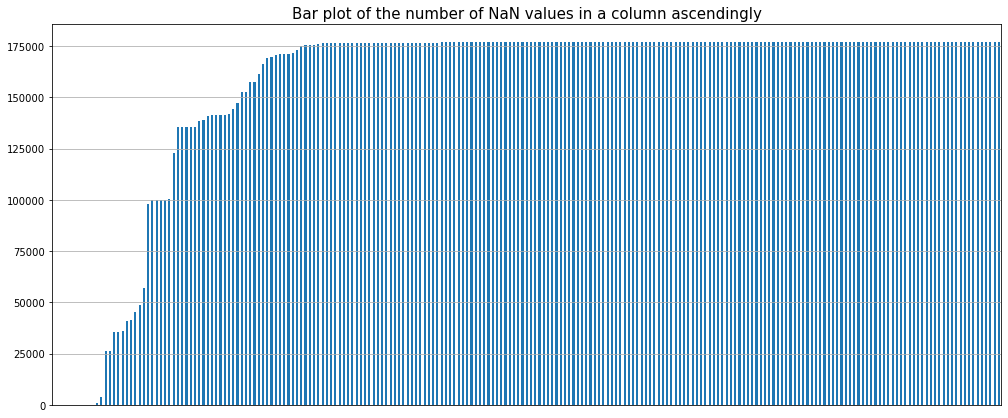

In [5]:
#Briefly check NaN value in each column
plt.figure(figsize = (17,7))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
df.isna().sum().sort_values(ascending = True).plot.bar()
plt.title('Bar plot of the number of NaN values in a column ascendingly', fontsize = 15)
plt.grid()
plt.show()

As shown, most of the columns have more than 50 000 NaN values. That is lots of NaN values to work with. Thus, in the beginning, only a few columns have fewer NaN values would be included to explore the data.

In [6]:
#Threshold 100000 now
nan_column = df.isna().sum().to_frame(name = 'count')
nan_column = nan_column[nan_column['count'] < 100000]
print('Number of columns that have less than 100000 NaN: ',len(nan_column))

Number of columns that have less than 100000 NaN:  27


In [7]:
#Create new dataframe to work with
X = df[nan_column.index.to_list()].copy()
X['title_en'] = df['dc.title_en'].copy()
X['annif_response_en'] = df['annif_response_en'].copy()
X['annif_keywords_en'] = df['annif_keywords_en'].copy()

#Drop some columns and change columns' name
# Assuming:
#    'dc.date.accessioned' = 'dc.date.available' = 'dc.date.issued' : Eventhough not really (X.head(5))
#    'dc.identifier.uri', 'dc.identifier.dscollection', 'dc.rights': Not important
#    'dc.date.issued_-', 'dc.language.iso_-', 'dc.subject.degreeprogram_-', 'dc.subject.discipline_-' : Overlap?
#    'dc.publisher' = 'dc.organization' = 'dc.contributor.organization' : Eventhough not really (count NaN values)
X.drop(['dc.date.accessioned', 'dc.date.available', 'dc.identifier.uri', 'dc.identifier.dscollection',
        'dc.rights', 'dc.date.issued_-', 'dc.language.iso_-',
        'dc.subject.degreeprogram_-', 'dc.subject.discipline_-', 'dc.publisher', 'dc.organization'], axis = 1, inplace = True)
X.rename(columns = {'dc.contributor.author': 'author', 'dc.date.issued': 'date', 'dc.type.ontasot': 'level',
                    'dc.description.abstract' : 'abstract',
                    'dc.description.abstract_fi' : 'abstract_fi', 'dc.description.abstract_en' : 'abstract_en',
                    'dc.language.iso' : 'language', 'dc.title' : 'title', 'dc.title_fi' : 'title_fi',
                    'dc.contributor.organization': 'contributor_organization',
                    'dc.subject.degreeprogram' : 'degree_program'}, inplace = True)

In [8]:
#REDUCE VALUES
############################ YEAR #####################
for i in range(2009, 2021):
    X['date'].loc[X['date'].str.contains(str(i), na = False)] = i
X.loc[X['date'].isnull()] = np.NaN

############################ LANGUAGE #####################
X['language'].loc[X['language'].str.contains('fi', na = False)] = 'fin'
X['language'].loc[X['language'].str.contains('en', na = False)] = 'eng'
X['language'].loc[~(X['language'].str.contains('fin', na = False) | X['language'].str.contains('eng', na = False))] = 'other'
X.loc[X['language'].isnull()] = np.NaN

############################ LEVEL #####################
X['level'].loc[X['level'].str.contains('Bachelor', na = False)] = 'Bachelor'
X['level'].loc[X['level'].str.contains('Master', na = False)] = 'Master'
X['level'].loc[~(X['level'].str.contains('Bachelor', na = False) | X['level'].str.contains('Master', na = False))] = np.NaN

############################ UNIVERSITY #####################
school_names = ['Centria', 'Metropolia', 'Laurea', 'Arcada', 'Häme', 'Karelia', 'Novia', 'Åland', 'Haaga-Helia',
                'Vaasa', 'Satakunta', 'Saimaa', 'Tampere', 'Turku', 'Jyväskylä', 'Kymenlaakso', 'Mikkeli', 'Savonia',
                'Kajaani', 'South-Eastern Finland', 'Lapland']

school_names_2 = {'Satakunnan' : 'Satakunta University of Applied Sciences',
                  'Lapin': 'Lapland University of Applied Sciences',
                  'Turun': 'Turku University of Applied Sciences',
                  'Diakonia': 'Diaconia University of Applied Sciences',
                  'Daikonia': 'Diaconia University of Applied Sciences',
                  'Lahden': 'Lahti University of Applied Sciences',
                  'Seinäjoen': 'Seinäjoki University of Applied Sciences',
                  'Keski-Pohjanmaan': 'Centria University of Applied Sciences',
                  'Humanistinen': 'Humak University of Applied Sciences',
                  'Pohjois-Karjalan': 'Karelia University of Applied Sciences',
                  'Rovaniemen': 'Rovaniemi University of Applied Sciences',
                  'Kaakkois-Suomen': 'South-Eastern Finland University of Applied Sciences',
                  'Poliisiammattikorkeakoulu': 'Police University College',
                  'Pirkanmaan' : 'Pirkanmaa University of Applied Sciences',
                  'Oulu' : 'Oulu University of Applied Sciences'}

for school_name in school_names:
    X['contributor_organization'].loc[X['contributor_organization'].str.contains(school_name, na = False, case = False)] = school_name + ' University of Applied Sciences'
for school_name in school_names_2:
    X['contributor_organization'].loc[X['contributor_organization'].str.contains(school_name, na = False)] = school_names_2[school_name]
X.loc[X['contributor_organization'].isnull()] = np.NaN

## 2. Data Visualization

In [9]:
fig = make_subplots(rows = 1, cols = 2,
                    specs = [[{"type": "domain"}, {"type": "domain"}]])

fig.add_trace(go.Pie(labels = list(Counter(X['language']).keys()), 
                     values = list(Counter(X['language']).values()),
                     textinfo = 'label+percent', insidetextorientation = 'radial'),
              row = 1, col = 1)

fig.add_trace(go.Pie(labels = list(Counter(X['date']).keys()), 
                     values = list(Counter(X['date']).values()),
                     textinfo = 'label+percent', insidetextorientation = 'radial'),
              row = 1, col = 2)

fig.show()

## 3. Extract the abstract and keywords

In [10]:
#Prepare the Finnish data
fin_data = X[['date', 'abstract_fi', 'title', 'annif_keywords_fi']].loc[
            X['language'].str.contains('fin', na = False)].copy()
fin_data.dropna(inplace = True)
print('Number of sample from Finnish dataset:', len(fin_data))

#Prepare the English data
eng_data = X[['date', 'abstract_en', 'title', 'annif_keywords_en']].loc[
            X['language'].str.contains('eng', na = False)].copy()
eng_data.dropna(inplace = True)
print('Number of sample from English dataset: ', len(eng_data))

fin_data.to_csv('fin_theseus_abstract.csv', index = False, header = True)
eng_data.to_csv('eng_theseus_abstract.csv', index = False, header = True)

Number of sample from Finnish dataset: 119006
Number of sample from English dataset:  11125


In [11]:
eng_data_2 = X[['date', 'abstract_en', 'contributor_organization']].loc[
             X['language'].str.contains('eng', na = False)].copy()
eng_data_2.dropna(inplace = True)
eng_data_2 = eng_data_2[eng_data_2['abstract_en'].str.len() > 1]
eng_data_2 = eng_data_2[eng_data_2['abstract_en'].map(detect) == 'en']
eng_data_2.to_csv('eng_theseus_abstract.csv', index = False, header = True)